JuliaTokyo #3 用のノートブックです。using xxx とある場合は、xxxパッケージを事前にインストールしておいてください

In [2]:
using PyCall
matplotlib = pyimport("matplotlib")
PyDict(matplotlib["rcParams"])["figure.figsize"] = (10, 5)
using PyPlot

## WAV.jl

In [3]:
using WAV

In [4]:
x, fs = wavread("test_files/test16k.wav");
x, fs = convert(Vector{Float64}, vec(x)), convert(Int, fs)
@show fs size(x)

fs => 16000
size(x) => (60700,)


(60700,)

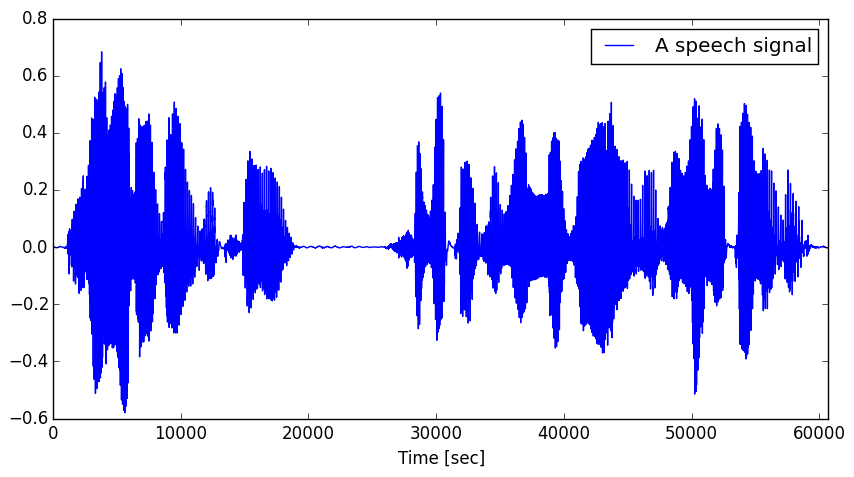

PyObject <matplotlib.legend.Legend object at 0x1165573d0>

In [5]:
plot(x, label="A speech signal")
xlabel("Time [sec]")
xlim(1, length(x))
legend()

## DSP.jl

In [6]:
using DSP

In [7]:
framelen, noverlap = 1024, 1024 - 80
X = spectrogram(x, framelen, noverlap, window=hanning)
t = time(X)
f = freq(X);

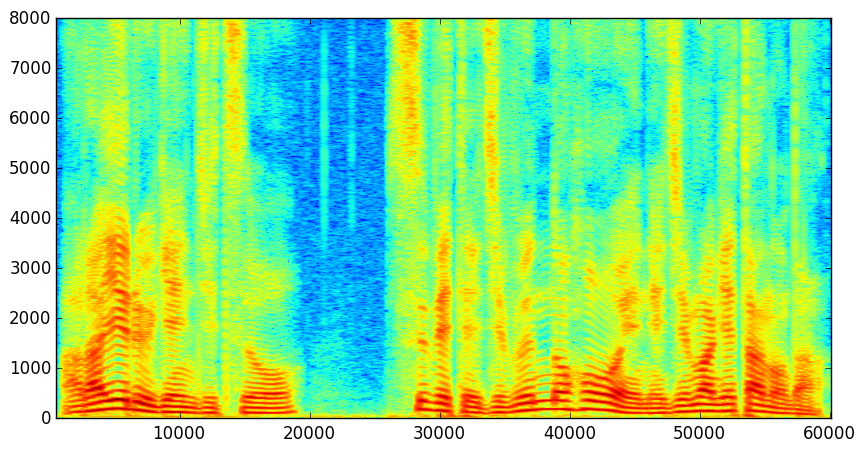

PyObject <matplotlib.image.AxesImage object at 0x11788b790>

In [8]:
# Plot power spectrogram
# axis X: time [sample]
# axis Y: Frequency [Hz] 
imshow(log(power(X)), extent=[first(t), last(t), fs*first(f), fs*last(f)], aspect="auto", origin="lower")

### Bandpass filter

In [9]:
# Create telephoen simulate digital filter
responsetype = Bandpass(300, 3400; fs=fs)
prototype = Butterworth(8)
telephone_filter = digitalfilter(responsetype, prototype);

In [10]:
# Perform filtering
xf = filt(telephone_filter, x);

In [11]:
Xf = spectrogram(xf, framelen, noverlap, window=hanning)
t = time(Xf)
f = freq(Xf);

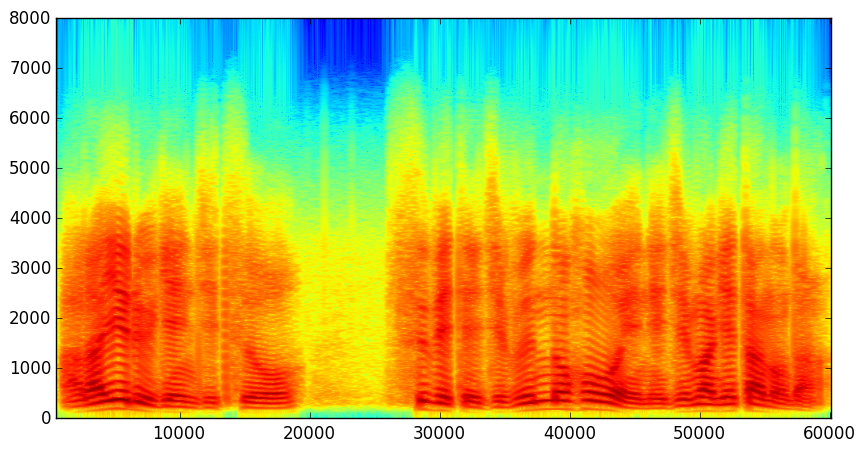

PyObject <matplotlib.image.AxesImage object at 0x112e1c9d0>

In [12]:
# Plot power spectrogram
# axis X: time [sample]
# axis Y: Frequency [Hz] 
imshow(log(power(Xf)), extent=[first(t), last(t), fs*first(f), fs*last(f)], aspect="auto", origin="lower")

In [13]:
# For more detailed introduction to DSP.jl, see http://www.seaandsailor.com/audiosp_julia.html.

## WORLD.jl

### 基本周波数 (Fundamental Frequency; F0）

In [14]:
using WORLD

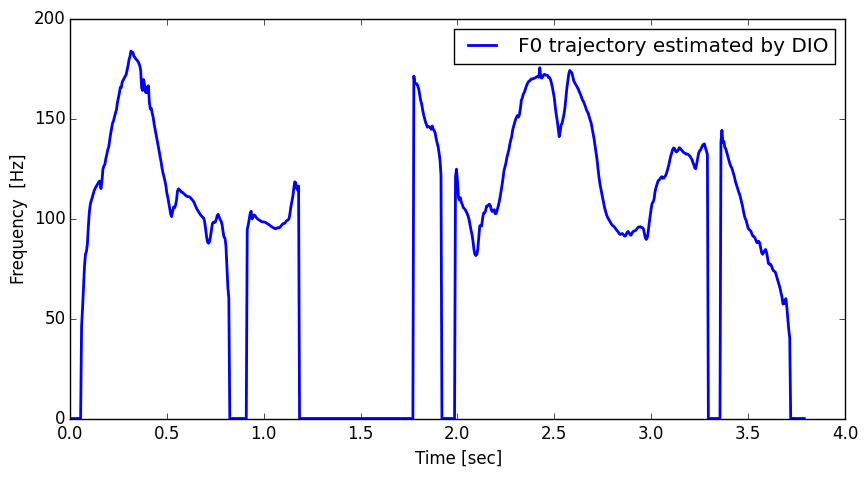

PyObject <matplotlib.legend.Legend object at 0x11b00f9d0>

In [15]:
period = 5.0
opt = DioOption(f0floor=40.0, f0ceil=700.0, channels_in_octave=2.0, period=period, speed=4)
f0, timeaxis = dio(x, fs, opt)

plot(timeaxis, f0, label="F0 trajectory estimated by DIO", linewidth="2")
xlabel("Time [sec]")
ylabel("Frequency  [Hz]")
legend()

### スペクトル包絡 (Spectrum Envelope)

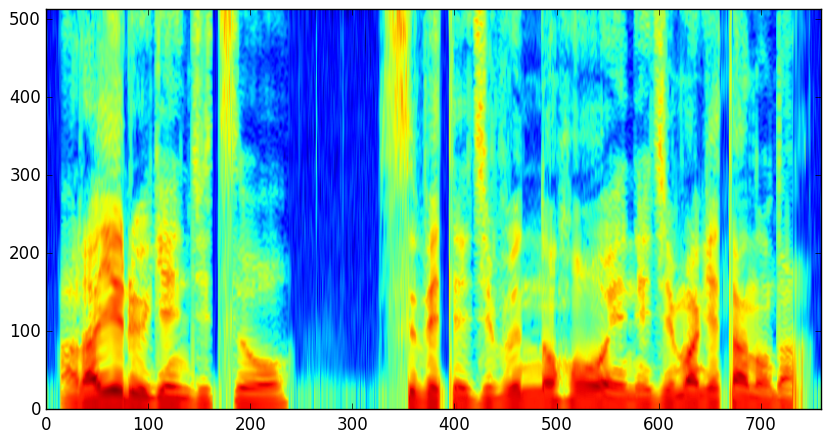

PyObject <matplotlib.image.AxesImage object at 0x11b6c0550>

In [16]:
spectrogram = cheaptrick(x, fs, timeaxis, f0)

imshow(log(spectrogram), origin="lower", aspect="auto")

### 非周期性指標 (Aperiodicity ratio)

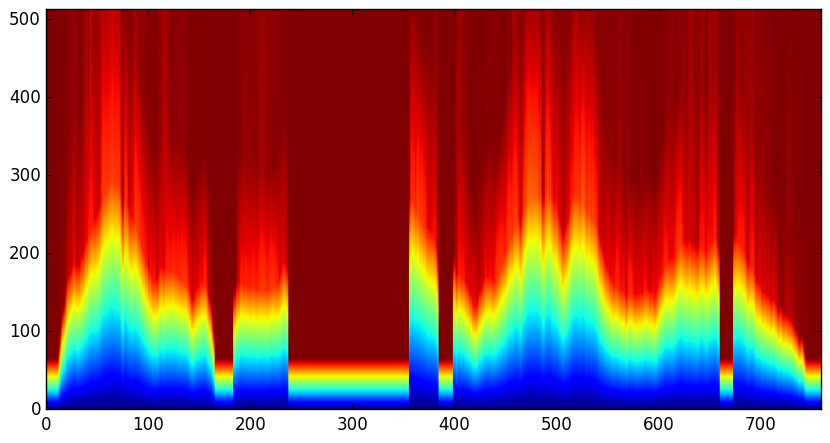

PyObject <matplotlib.image.AxesImage object at 0x11a0b4a10>

In [17]:
aperiodicity = aperiodicityratio(x, fs, f0, timeaxis)

imshow(log(aperiodicity), origin="lower", aspect="auto")

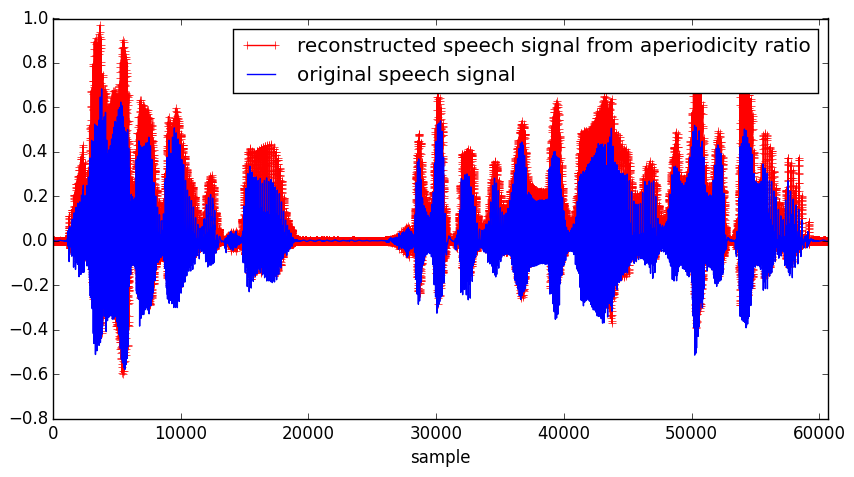

PyObject <matplotlib.legend.Legend object at 0x1187c26d0>

In [18]:
# Sysnthesis from f0, spectral envelope and aperiodicity ratio.
ya = synthesis_from_aperiodicity(f0, spectrogram, aperiodicity, period, fs, length(x))

plot(1:endof(ya), ya, "r-+", label="reconstructed speech signal from aperiodicity ratio")
plot(1:endof(x), x, label="original speech signal")
xlim(1, endof(ya))
xlabel("sample")
legend()

## 僕が音声系で使う/作ったパッケージ一覧

- [WAV](https://github.com/dancasimiro/WAV.jl) WAVファイルの読み込み
- [DSP](https://github.com/JuliaDSP/DSP.jl) 窓関数、スペクトログラム、デジタルフィルタ
- [WORLD](https://github.com/r9y9/WORLD.jl) 音声分析・合成フレームワーク
- [MelGeneralizedCepstrums](https://github.com/r9y9/MelGenralizedCepstrums.jl) メル一般化ケプストラム分析
- [SynthesisFilters](https://github.com/r9y9/SynthesisFilters.jl) メル一般化ケプストラムからの波形合成
- [SPTK](https://github.com/r9y9/SPTK.jl) 音声信号処理ツールキット
- [RobustPCA](https://github.com/r9y9/RobustPCA.jl) ロバスト主成分分析(歌声分離へ応用)
- [REAPER](https://github.com/r9y9/REAPER.jl) 基本周波数推定
- [VoiceConversion](https://github.com/r9y9/VoiceConversion.jl) 統計的声質変換

このノートブックで使ったパッケージを含みます。

紹介した機能はごく一部なので、詳細は各パッケージのドキュメントをチェックしてください。